**Experiment with logit**

Trying out different evaluation metrics. The summary is that logistic regression seems to hit about 0.6 accuracy all the time, and different parameterizations seem to permute the predictions randomly. Basically it's just guessing at random.

In [45]:
import cv2
import numpy as np
import pandas as pd
import os
import glob
import re
import pickle
from matplotlib import pyplot as plt
from sklearn import datasets, neighbors, linear_model, model_selection, svm
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, KFold, learning_curve, LeavePOut, GridSearchCV

# import private libraries
import src.utils as utils

In [24]:
train_data = pickle.load(open( "train_data_binary_threshold.pkl", "rb"))
test_data = pickle.load(open( "test_data_binary_threshold.pkl", "rb"))

In [25]:
y = train_data["y"]
X = train_data.drop('y', axis=1)
X.shape

(49, 2)

In [7]:
lpo = LeavePOut(2)

In [8]:
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000, penalty='l2')

In [9]:
logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
xval_scores = model_selection.cross_val_score(logistic, X, y, cv=lpo, scoring='accuracy')

In [11]:
xval_scores_kfold = model_selection.cross_validate(logistic, X, y, cv=4, return_estimator=True)

In [12]:
xval_scores.mean()

0.5697278911564626

In [13]:
test_data_y = test_data['y']

In [14]:
test_data_x = test_data.drop('y', axis=1)

In [15]:
logistic.score(test_data_x, test_data_y )

0.42857142857142855

In [16]:
train_data_with_path = pickle.load(open( "train_data_binary_with_path.pkl", "rb"))
test_data__with_path = pickle.load(open( "test_data_binary_with_path.pkl", "rb"))

In [17]:
before_path = train_data_with_path['before_path']

In [18]:
after_path = train_data_with_path['after_path']

In [19]:
xval_scores_kfold['estimator']

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='warn',
           n_jobs=None, penalty='l2', rand

In [20]:
for estimator in xval_scores_kfold['estimator']:
    print(test_data_y == estimator.predict(test_data_x))

2       True
32     False
24     False
24b    False
6       True
7       True
41      True
Name: y, dtype: bool
2      False
32      True
24      True
24b     True
6      False
7      False
41     False
Name: y, dtype: bool
2      False
32      True
24      True
24b     True
6      False
7      False
41     False
Name: y, dtype: bool
2      False
32      True
24      True
24b     True
6      False
7      False
41     False
Name: y, dtype: bool


In [21]:
X

,hist0,hist255
1,-93288.0,-5016.0
1,-95190.0,-3114.0
1,-1902.0,1902.0
1,-299.0,299.0
1,40911.0,561.0
1,-12727.0,-49.0
10,-424.0,424.0
10,40262.0,1210.0
10,41055.0,417.0
10,40326.0,1146.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
logistic.score(X_test, y_test)

0.4666666666666667

In [69]:
# benchmark against dumb heuristics using DummyClassifier
dummy = DummyClassifier() # default: respect training set distribution
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.4666666666666667

In [48]:
metrics.f1_score(y_test, dummy.predict(X_test), pos_label='I')

0.631578947368421

In [50]:
metrics.f1_score(y_test, logistic.predict(X_test), pos_label='I')

0.6363636363636365

In [71]:
positive_probabilities = logistic.predict_proba(X_test)[:, 0]
dummy_probabilities = dummy.predict_proba(X_test)[:, 0]

In [72]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, positive_probabilities, pos_label='I')
dummy_fpr, dummy_tpr, dummy_thresholds = metrics.roc_curve(y_test, dummy_probabilities, pos_label='I')

print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.66666667 0.66666667 1.
 1.        ]
[0.         0.08333333 0.16666667 0.16666667 0.25       0.25
 1.        ]
[1.60586713 0.60586713 0.60577517 0.60203205 0.56265049 0.55870118
 0.48808204]


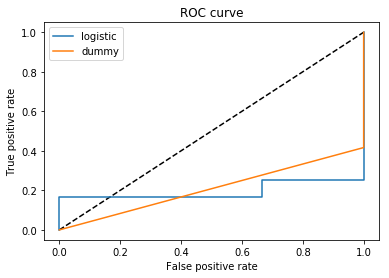

In [74]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='logistic')
plt.plot(dummy_fpr, dummy_tpr, label='dummy')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()